# Data Grapher FreeCodeCamp Project

## Code:

In [1]:
# Imports
!pip install datapackage
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import numpy as np
import datapackage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.5 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=2f12d62a49c4b71babeec48e3dd66c46387a5bdc5037a3c14622f4ff2922899b
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
  Create

In [2]:
def grapher():
  # Get user input of what upload method they will be using
  print(f'Methods of uploading data:\n 1. Uploading it from the local computer \n 2. Uploading it from a URL \n 3. Use test data for an example \n')
  im = int(input("Enter # method to upload data: "))

  table = None

  # Load data based on user input
  if im == 1:
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    table = pd.read_csv(io.BytesIO(uploaded[file_name]))
  elif im == 2:
    url = input(f"\nEnter url: ")
    table = pd.read_csv(url)
  else:
    if im != 3:
      print(f"\nInput not found using test data.")
    url = "https://datahub.io/core/oil-prices/datapackage.json"
    package = datapackage.Package(url)
    resources = package.resources
    for resource in resources:
      if resource.tabular:
        table = pd.read_csv(resource.descriptor['path'])

  # Display heads and first two rows of dataframe
  print(f"\nPreview dataframe:")
  print(table.head(2))

  # Display column names
  col = table.columns
  col_names = list()
  print(f"\nColumns: ")
  for name in col:
    print(f'\t', name)
    col_names.append(name)

  # User input to customize graph
  title = input(f"\nEnter title of graph: ")
  xcol = input(f"\nEnter name of column to be on the X-Axis: ")
  ycol = input("Enter name of column to be on the Y-Axis: ")

  if xcol not in col_names:
    print(f'ERROR! Column name not found.')
    xcol = input("Enter name of column to be on the X-Axis (use correct spelling and capitalization): ")

  if ycol not in col_names:
    print(f'ERROR! Column name not found.')
    ycol = input("Enter name of column to be on the Y-Axis (use correct spelling and capitalization): ")

  SorL = input(f"\nEnter 1 for a Scatter Plot graph and 2 for a Line graph: ")
  if SorL != "1" and SorL != "2":
    print("ERROR! Input not valid, defaulting to line graph.")
    SorL = 2
  else:
    SorL = int(SorL)
  print(f'\n')
  # Creating the graph
  x = table[xcol].to_numpy()
  y = table[ycol].to_numpy()
  xmin = np.min(x)
  xmax = np.max(x)
  ymin = np.min(y) - 5
  ymax = np.max(y) + 5
  fig, ax = plt.subplots()
  plt.axis([xmin, xmax, ymin, ymax])
  if SorL == 1:
    plt.plot(x,y, 'ro') # scatterplot
  else:
    plt.plot(x,y, 'b') # line graph
  ax.set_title(title)
  ax.set_ylabel(ycol)
  ax.set_xlabel(xcol)
  plt.show()

## Display

Run to use data grapher:

Methods of uploading data:
 1. Uploading it from the local computer 
 2. Uploading it from a URL 
 3. Use test data for an example 

Enter # method to upload data: 3

Preview dataframe:
   Date  WTI Spot Price
0  1986           15.05
1  1987           19.20

Columns: 
	 Date
	 WTI Spot Price

Enter title of graph: Oil WTI Spot Price

Enter name of column to be on the X-Axis: Date
Enter name of column to be on the Y-Axis: WTI Spot Price

Enter 1 for a Scatter Plot graph and 2 for a Line graph: 2




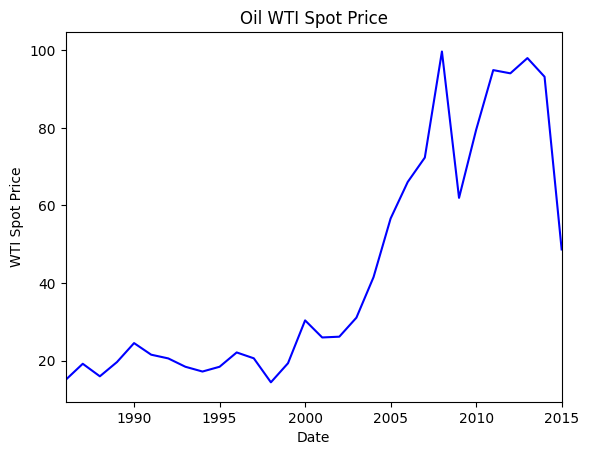

In [3]:
grapher()